In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import scanpy as sc
import scvi

sc.set_figure_params(figsize=(10, 10))

%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
%config InlineBackend.figure_format='retina'

Global seed set to 0


In [2]:
import anndata as ad
gene_matrix_df = pd.read_csv("https://www.dropbox.com/s/910hhahxsbd9ofs/gene_matrix_all_new.csv?dl=1", header=0, sep=",")

In [3]:
genes_list_df = pd.read_csv("https://www.dropbox.com/s/11dmp8ki6tui2zu/genes.tsv?dl=1", header=None, sep="\t")

In [4]:
gene_matrix_df

,m1_AAACCTGAGAGCAATT.1,m1_AAACCTGCAAGCTGTT.1,m1_AAACCTGCAGGATCGA.1,m1_AAACCTGCATCCAACA.1,m1_AAACCTGTCAGTCCCT.1,m1_AAACCTGTCGTCCGTT.1,m1_AAACCTGTCTGTCTCG.1,m1_AAACGGGAGGCTAGAC.1,m1_AAACGGGCAATGAAAC.1,m1_AAACGGGTCCCTCTTT.1,...,m2_TTTGTCAAGAAGATTC.1,m2_TTTGTCAAGAGTTGGC.1,m2_TTTGTCACAGCCTATA.1,m2_TTTGTCACAGGAATGC.1,m2_TTTGTCACAGTGACAG.1,m2_TTTGTCAGTTGGAGGT.1,m2_TTTGTCAGTTTGTTTC.1,m2_TTTGTCATCAACTCTT.1,m2_TTTGTCATCACGACTA.1,m2_TTTGTCATCGTGGACC.1
ENSMUSG00000033845,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
ENSMUSG00000025903,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
ENSMUSG00000033813,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,1,0,1
ENSMUSG00000033793,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1
ENSMUSG00000025907,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000094915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000079808,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
ENSMUSG00000095041,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
ENSMUSG00000063897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Convert ensembl names to gene names
def convert_ensembl(gene_matrix_df, genes_list_df):
    # Copy of gene matrix
    gene_matrix_df_copy = gene_matrix_df.copy(deep=True)
    
    # Transpose
    gene_matrix_df_copy_transposed = gene_matrix_df_copy.T
    
    # Create dictionary from gene list for translating ensembl names
    genes_list_dict = dict(zip(genes_list_df[0], genes_list_df[1]))
    
    # Return a new matrix
    translated_matrix = gene_matrix_df_copy_transposed.rename(columns = lambda x: genes_list_dict.get(x))
    return translated_matrix

In [6]:
# Translate ensembl names
converted_matrix = convert_ensembl(gene_matrix_df, genes_list_df)

In [7]:
converted_matrix

,Mrpl15,Lypla1,Tcea1,Atp6v1h,Rb1cc1,4732440D04Rik,Pcmtd1,Gm26901,Rrs1,Vcpip1,...,AC133103.1,AC132444.1,Csprs,AC125149.3,AC125149.2,AC168977.2,AC168977.1,PISD,DHRSX,CAAA01147332.1
m1_AAACCTGAGAGCAATT.1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
m1_AAACCTGCAAGCTGTT.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
m1_AAACCTGCAGGATCGA.1,0,0,0,1,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
m1_AAACCTGCATCCAACA.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
m1_AAACCTGTCAGTCCCT.1,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
m2_TTTGTCAGTTGGAGGT.1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
m2_TTTGTCAGTTTGTTTC.1,0,0,1,1,0,0,1,0,0,0,...,0,0,2,0,0,0,0,0,0,0
m2_TTTGTCATCAACTCTT.1,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
m2_TTTGTCATCACGACTA.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
adata = ad.AnnData(converted_matrix, dtype="int64")

/opt/conda/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [9]:
adata

AnnData object with n_obs × n_vars = 7097 × 11713

In [10]:
sc.pp.filter_cells(adata, min_genes = 200)
sc.pp.filter_genes(adata, min_cells = 3)

/opt/conda/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/conda/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [11]:
adata

AnnData object with n_obs × n_vars = 7065 × 11713
    obs: 'n_genes'
    var: 'n_cells'

In [12]:
# Filter out mitochondrial cells
adata.var['mt'] = adata.var_names.str.startswith('mt-')
sc.pp.calculate_qc_metrics(adata, qc_vars = ['mt'], percent_top = None, log1p = False, inplace = True)
adata = adata[adata.obs.pct_counts_mt < 15]

In [13]:
adata.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
m1_AAACCTGAGAGCAATT.1,1018,1018,2457,0,0.0
m1_AAACCTGCAAGCTGTT.1,695,695,1497,0,0.0
m1_AAACCTGCAGGATCGA.1,2347,2347,8026,0,0.0
m1_AAACCTGCATCCAACA.1,711,711,1332,0,0.0
m1_AAACCTGTCAGTCCCT.1,1539,1539,3883,0,0.0
...,...,...,...,...,...
m2_TTTGTCAGTTGGAGGT.1,777,777,1580,0,0.0
m2_TTTGTCAGTTTGTTTC.1,1072,1072,2908,0,0.0
m2_TTTGTCATCAACTCTT.1,1468,1468,3701,0,0.0
m2_TTTGTCATCACGACTA.1,703,703,1320,0,0.0


In [14]:
# Save raw counts data
adata.layers['counts'] = adata.X.copy()

/opt/conda/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/tmp/ipykernel_53/2368136566.py:2: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata.layers['counts'] = adata.X.copy()


In [15]:
adata

AnnData object with n_obs × n_vars = 7065 × 11713
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    layers: 'counts'

In [16]:
# Normalize data
sc.pp.normalize_total(adata, target_sum = 1e4)
# Log scale
sc.pp.log1p(adata)
# Save raw data
adata.raw = adata

In [17]:
# Highly variable genes
sc.pp.highly_variable_genes(adata, n_top_genes=2000, subset = True, layer = 'counts', flavor = 'seurat_v3', batch_key=None)

In [18]:
# Setup scvi model
scvi.model.SCVI.setup_anndata(adata, layer = 'counts', batch_key=None)

In [19]:
# Initialize Model
model = scvi.model.SCVI(adata)

In [20]:
model

SCVI Model with the following params: 
n_hidden: 128, n_latent: 10, n_layers: 1, dropout_rate: 0.1, dispersion: gene, gene_likelihood: zinb, 
latent_distribution: normal
Training status: Not Trained

In [21]:
# Train model (Took 7 minutes)
model.train()

/opt/conda/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Torchmetrics v0.9 introduced a new argument class property called `full_state_update` that has
                not been set for this class (ElboMetric). The property determines if `update` by
                default needs access to the full metric state. If this is not the case, significant speedups can be
                achieved and we recommend setting this to `False`.
                We provide an checking function
                `from torchmetrics.utilities import check_forward_full_state_property`
                that can be used to check if the `full_state_update=True` (old and potential slower behaviour,
                default for now) or if `full_state_update=False` can be used safely.
                
  warnings.warn(*args, **kwargs)
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Epoch 400/400: 100%|███████████████████████████████████████████████| 400/400 [06:58<00:00,  1.05s/it, loss=499, v_num=1]


In [22]:
# Latent space
latent = model.get_latent_representation()

In [23]:
# Represented as a numpy array
latent.shape

(7065, 10)

In [24]:
# Save latent space to adata object
adata.obsm['X_scVI'] = latent

In [25]:
# Save scVI normalized expression values to adata
adata.layers['scvi_normalized'] = model.get_normalized_expression(library_size = 1e4)

In [27]:
# Perform clustering for scData by computing neighbors
sc.pp.neighbors(adata, use_rep = 'X_scVI')

# UMAP for non linear dimensional reduction
sc.tl.umap(adata)

# Leiden algorithm
sc.tl.leiden(adata, resolution = 0.75)

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


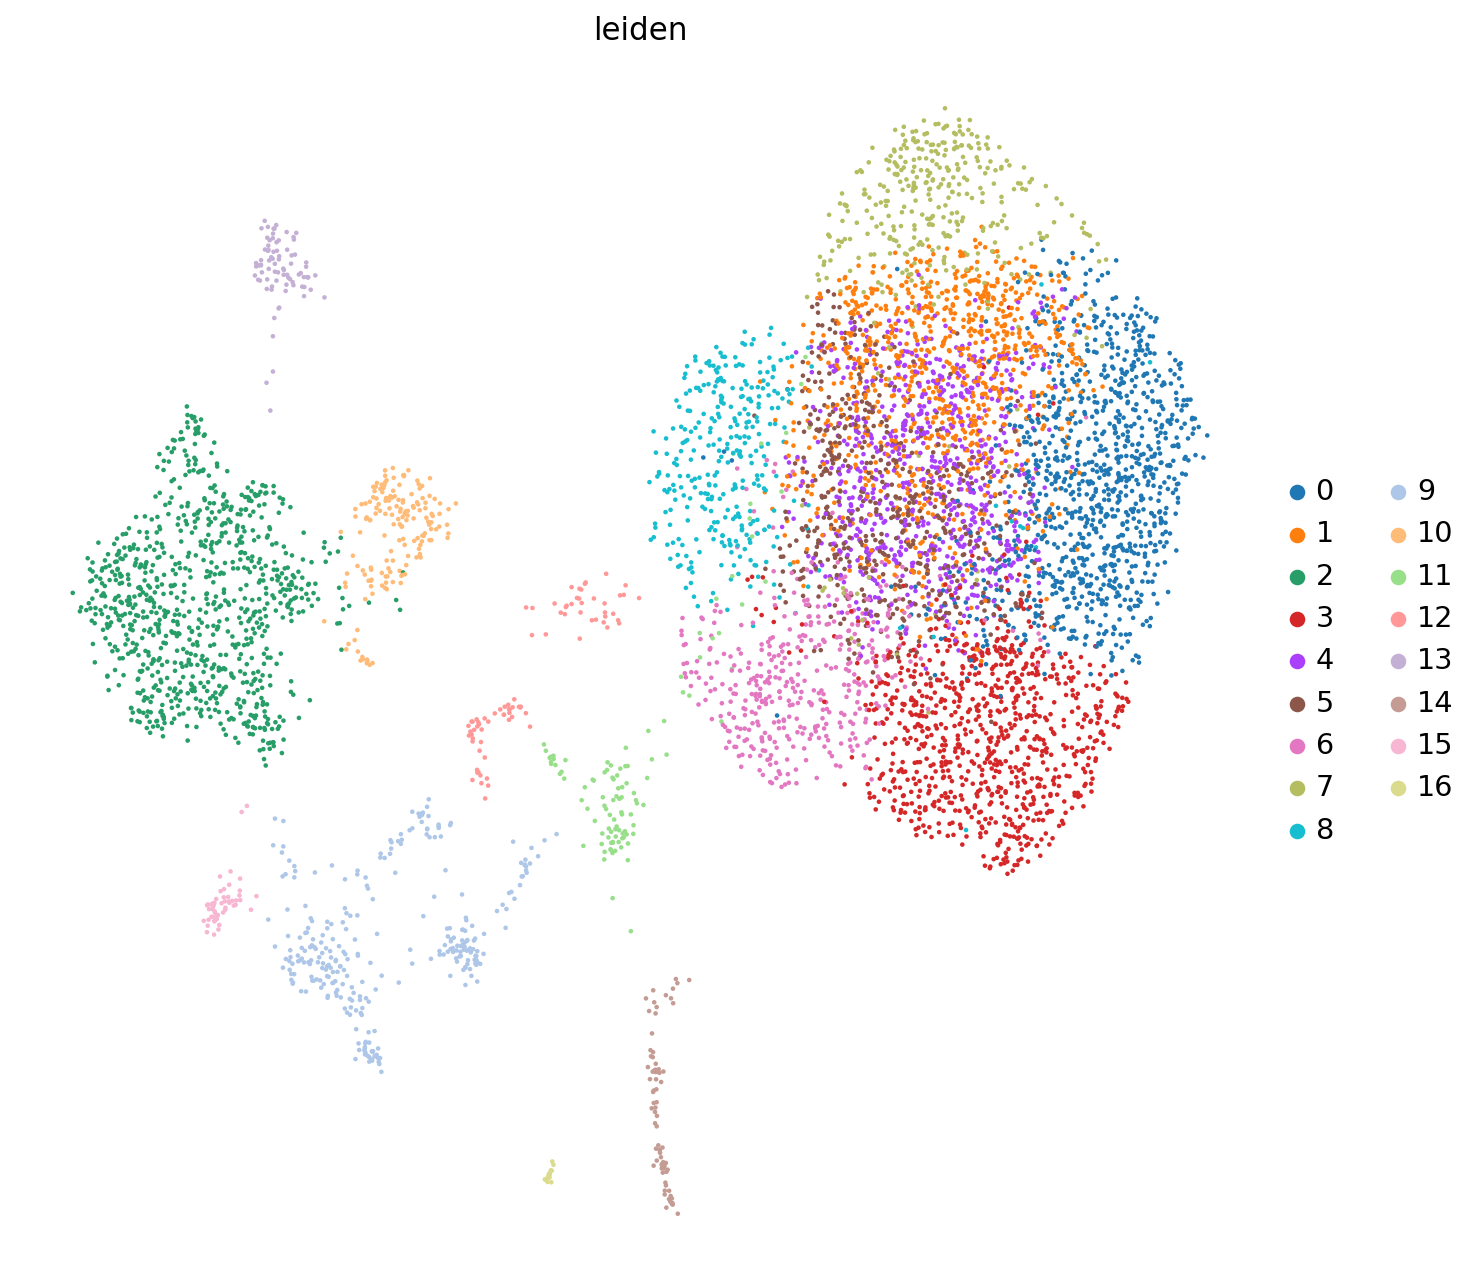

In [28]:
# Plot UMAP  
sc.pl.umap(adata, color = ['leiden'], frameon = False)

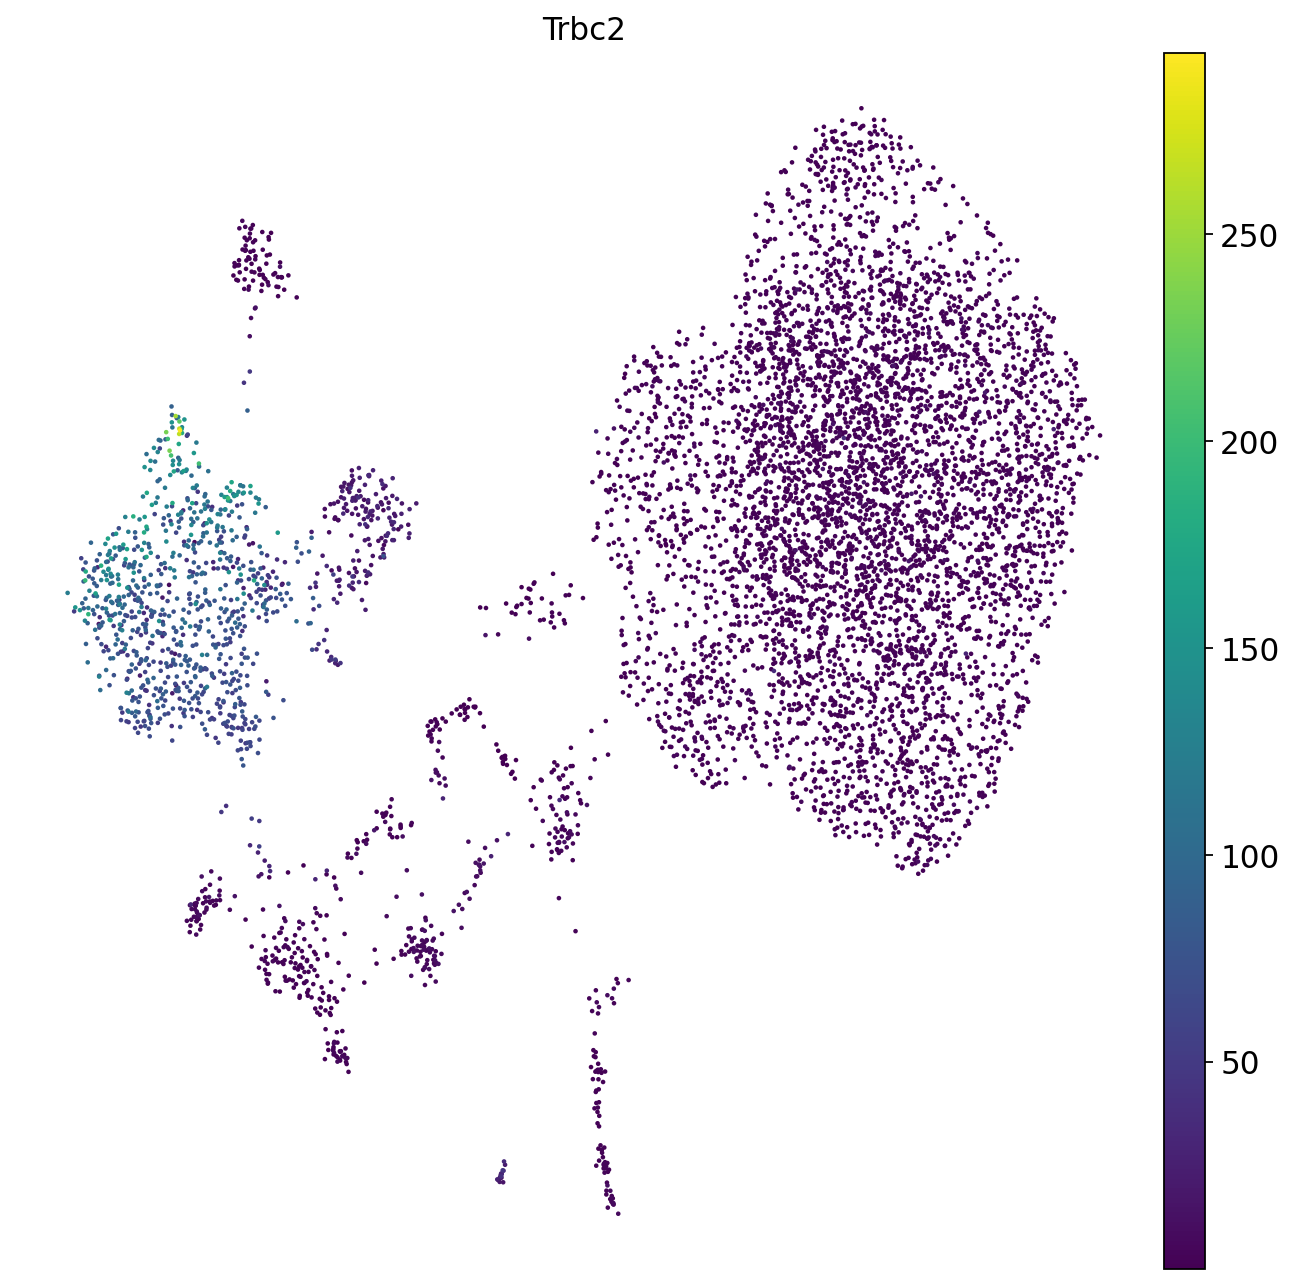

In [29]:
sc.pl.umap(adata, color = ['Trbc2'], frameon = False, layer = 'scvi_normalized')

In [30]:
df = model.differential_expression(groupby = 'leiden')

DE...: 100%|████████████████████████████████████████████████████████████████████████████| 17/17 [00:10<00:00,  1.66it/s]


In [31]:
df

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
Cpa3,0.9796,0.0204,3.871609,3.869932e-08,0.000013,0.0,0.25,-4.531857,-4.600522,6.432667,...,0.000000,0.004990,0.000000,0.002495,0.000000,0.098559,True,0 vs Rest,0,Rest
Sash1,0.9702,0.0298,3.482994,3.740890e-07,0.000009,0.0,0.25,-3.195659,-3.206565,5.202449,...,0.000000,0.004491,0.000000,0.003493,0.000000,0.076147,True,0 vs Rest,0,Rest
Tox,0.9692,0.0308,3.448956,4.918053e-06,0.000067,0.0,0.25,-3.418009,-3.530998,4.581159,...,0.000950,0.035595,0.000950,0.028609,0.025529,0.519046,True,0 vs Rest,0,Rest
Kel,0.9690,0.0310,3.442277,3.837453e-05,0.000014,0.0,0.25,2.918644,2.927561,4.596781,...,0.001899,0.005988,0.001899,0.003659,0.073509,0.021344,True,0 vs Rest,0,Rest
Cdkn2a,0.9684,0.0316,3.422488,1.772210e-06,0.000017,0.0,0.25,-2.870996,-2.955039,5.250279,...,0.000000,0.003659,0.000000,0.002828,0.000000,0.055996,True,0 vs Rest,0,Rest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Usmg5,0.6276,0.3724,0.521934,1.302195e-03,0.001545,0.0,0.25,-0.204332,-0.251159,0.545391,...,0.625000,0.718684,0.500000,0.425167,13.523697,15.440049,False,16 vs Rest,16,Rest
Cox6c,0.6228,0.3772,0.501450,2.347874e-03,0.002826,0.0,0.25,-0.229714,-0.266687,0.552776,...,0.937500,1.385870,0.437500,0.628174,19.854038,29.920338,False,16 vs Rest,16,Rest
Srp19,0.6126,0.3874,0.458254,4.479542e-04,0.000488,0.0,0.25,-0.053231,-0.112129,0.607221,...,0.125000,0.261172,0.125000,0.197049,2.500194,5.610895,False,16 vs Rest,16,Rest
Minos1,0.5182,0.4818,0.072832,1.930464e-03,0.001741,0.0,0.25,0.202587,0.146727,0.548583,...,0.937500,0.762378,0.625000,0.451553,22.880235,17.029292,False,16 vs Rest,16,Rest


In [32]:
print(df.loc["C1qa"])

      proba_de  proba_not_de  bayes_factor    scale1    scale2  pseudocounts  \
C1qa    0.9362        0.0638      2.686076  0.000024  0.000224           0.0   
C1qa    0.9200        0.0800      2.442347  0.000080  0.000225           0.0   
C1qa    0.9254        0.0746      2.518085  0.000073  0.000265           0.0   
C1qa    0.9278        0.0722      2.553376  0.000073  0.000221           0.0   
C1qa    0.9412        0.0588      2.773014  0.000035  0.000275           0.0   
C1qa    0.9280        0.0720      2.556365  0.000043  0.000230           0.0   
C1qa    0.9258        0.0742      2.523894  0.000096  0.000211           0.0   
C1qa    0.9304        0.0696      2.592850  0.000070  0.000219           0.0   
C1qa    0.9234        0.0766      2.489465  0.000076  0.000235           0.0   
C1qa    0.9594        0.0406      3.162540  0.000432  0.000175           0.0   
C1qa    0.9456        0.0544      2.855455  0.000029  0.000192           0.0   
C1qa    0.9892        0.0108      4.5173

In [ ]:
# Graph dataframe for top genes in each cluster 
targetGenes1 = ["Trbc2", "Cd3e", "Cd3d", 
                 "Bhlhe41", "Zbtb32", "1810046K07Rik",
                 "Ighd", "Cd22",
                 "Gzma", "Ccl5", "Ncr1",
                 "Ccl6", "Ccl9", "Wfdc17",
                 "Vpreb3", "Ifi30",
                 "Jchain",
                 "Mmp12", "Ffar2", "Ppp1r14a",
                 "Ppt1",
                 "Car1", "Car2", "Klf1",
                 "S100a8", "S100a9", "Ngp",
                 "Hba-a2", "Hbb-bs", "Hba-a1",
                 "Vcam1", "C1qa", "Hmox1",
                 "Siglech", "Bst2", "Cox6a2",
                 "Cacnb3", "Cxcl16"]
markers1 = {}
for c in adata.obs.leiden.cat.categories:
    cell_df = df.loc[df.group1 == c]
    match_genes = [x for x in cell_df.index.tolist() if x in targetGenes1]
    #match_genes = list(set(targetGenes1).intersection(set(cell_df.index.tolist())))
    #print(match_genes)
    markers1[c] = match_genes[0:10]


In [ ]:
adata

AnnData object with n_obs × n_vars = 7065 × 2000
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', '_scvi_raw_norm_scaling'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'log1p', 'hvg', '_scvi_uuid', '_scvi_manager_uuid', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'X_scVI', 'X_umap'
    layers: 'counts', 'scvi_normalized'
    obsp: 'distances', 'connectivities'

In [35]:
new_cluster_names = [
    'B-1 cells0', #0
    'B-1 cells1', #1
    'T cells',   #2
    'B-1 cells3', #3
    'B-1 cells4', #4
    'B-1 cells5', #5
    'B-1 cells6', #6
    'B-1 cells7', #7
    'B-1 cells8', #8
    'Monocytes', #9
    'NK cells',  #10
    'RP macrophages', #11
    'Langerhans cells', #12
    'Plasma cells', #13
    'Neutrophils', #14
    'pDCs', #15
    'CD4 cDCs' #16?
]
adata.rename_categories('leiden', new_cluster_names)

/opt/conda/lib/python3.10/site-packages/anndata/_core/anndata.py:1160: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  self.obs[key].cat.rename_categories(categories, inplace=True)


/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


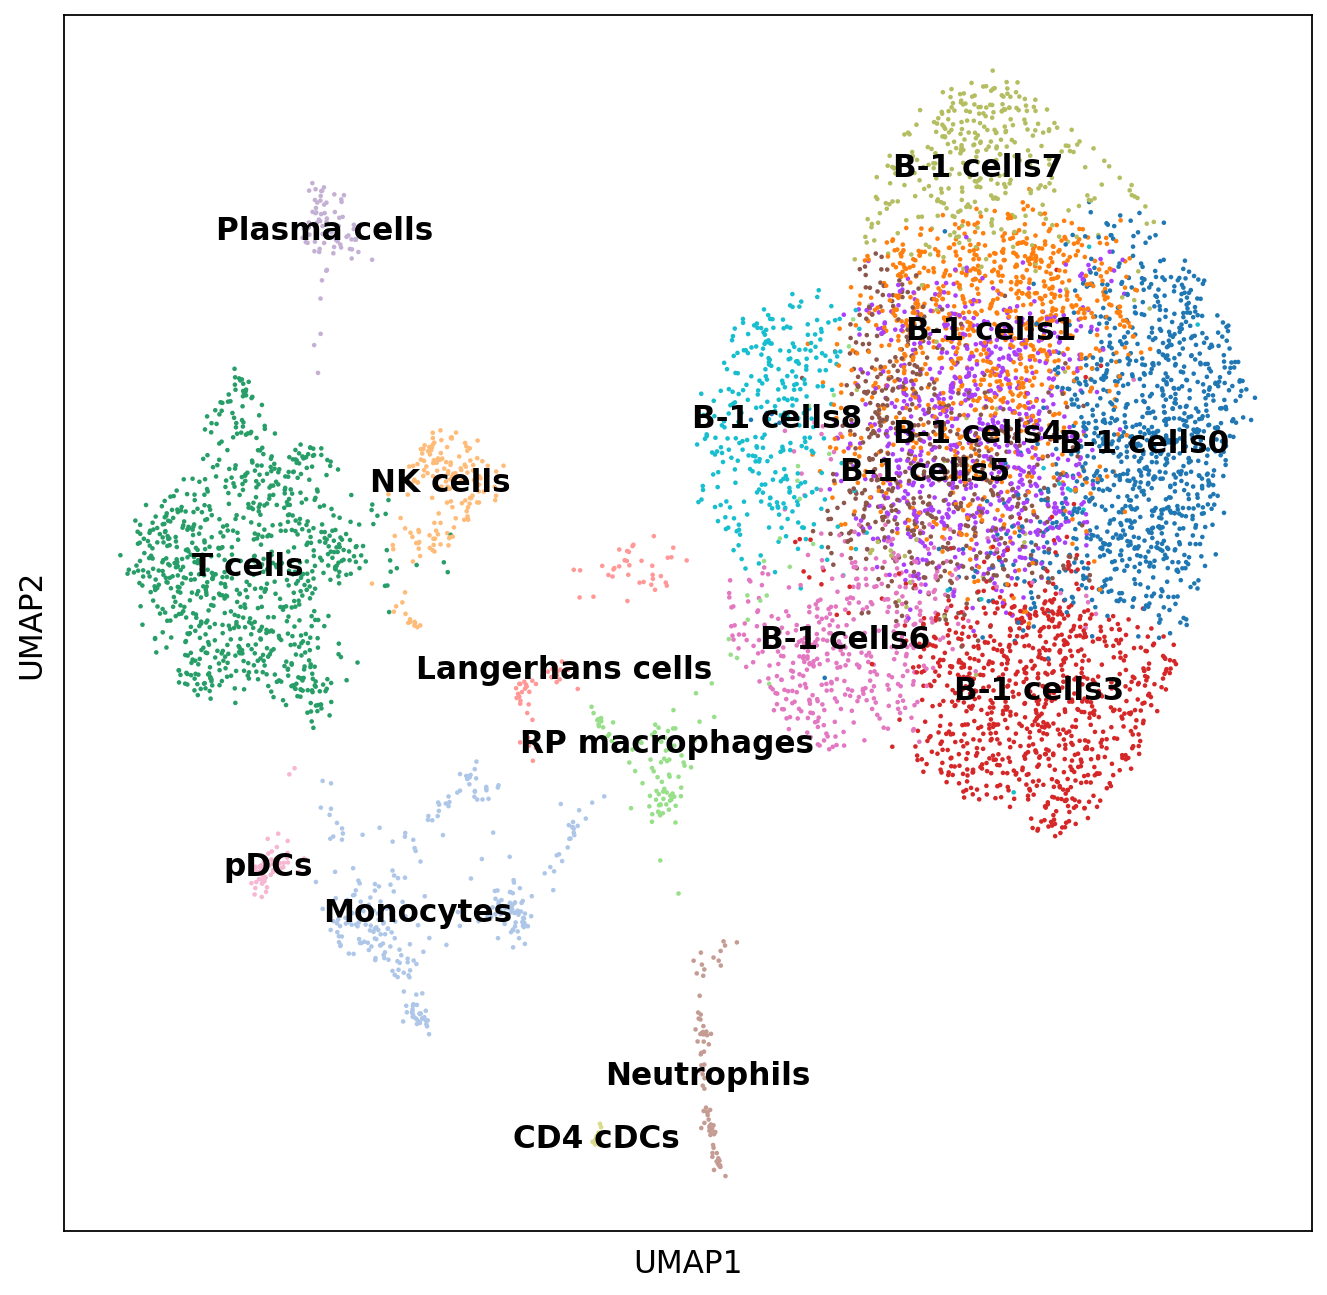

In [36]:
sc.pl.umap(adata, color='leiden', legend_loc='on data', title='', frameon=True)